In [1]:
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Conexión a la base de datos 

server = 'localhost\\SQLEXPRESS'
database = 'DAFT01_Grupo1_nba'

# Create a connection string
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=' + server + ';'  # replace with your server name
    'DATABASE=' + database + ';'  # the database you want to connect to
    'Trusted_Connection=yes;'
)

In [3]:
# Establecer conexión
connection = pyodbc.connect(conn_str)

# Lista de tablas para recorrer
tablas = ['season','State','City','Arena','Location','Proveniencia','teams','teams_History','Games','Game_stats','Player','Draft']

# Diccionario para almacenar los DataFrames
dataframes = {}

# Recorrer la lista de tablas y extraer los datos
for tabla in tablas:
    query = f'SELECT * FROM {tabla}'
    df = pd.read_sql_query(query, connection)
    dataframes[tabla] = df

# Cerrar la conexión
connection.close()



C:\Users\Dario\AppData\Local\Temp\ipykernel_15904\4080401499.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [4]:
# Mostrar los nombres de las tablas y las primeras filas de cada DataFrame
for tabla, df in dataframes.items():
    print(f"Tabla: {tabla}")
    print(df.head(), "\n")

Tabla: season
   ID_season season_type  season
0      12005  Pre Season    2005
1      12006  Pre Season    2006
2      12007  Pre Season    2007
3      12008  Pre Season    2008
4      12009  Pre Season    2009 

Tabla: State
   ID_state          state
0         1        Atlanta
1         2  Massachusetts
2         3           Ohio
3         4      Louisiana
4         5       Illinois 

Tabla: City
   ID_city         city
0        1      Atlanta
1        2       Boston
2        3    Cleveland
3        4  New Orleans
4        5      Chicago 

Tabla: Arena
   ID_arena                       arena  arenacapacity
0         1            State Farm Arena        18729.0
1         2                   TD Garden        19156.0
2         3  Rocket Mortgage FieldHouse        19432.0
3         4        Smoothie King Center        16867.0
4         5               United Center        21711.0 

Tabla: Location
   ID_location  ID_city  ID_state
0            1        1         1
1            2        

In [5]:
# Acceder a los DataFrame específicos
df_season = dataframes['season']
df_state = dataframes['State']
df_city = dataframes['City']
df_arena = dataframes['Arena']
df_location = dataframes['Location']
df_proveniencia = dataframes['Proveniencia']
df_teams = dataframes['teams']
df_teams_history = dataframes['teams_History']
df_games = dataframes['Games']
df_game_stats = dataframes['Game_stats']
df_player = dataframes['Player']
df_draft = dataframes['Draft']

In [6]:
# Recorro las columnas para ver la informacion de game_stats

for i in df_game_stats.columns:
    print(i)
    print(df_game_stats[i].describe())
    print('-----------------------------------')

ID_game_stats
count    57053.000000
mean     29855.047710
std      16642.493966
min          7.000000
25%      15474.000000
50%      29875.000000
75%      44259.000000
max      58664.000000
Name: ID_game_stats, dtype: float64
-----------------------------------
ID_game
count    5.705300e+04
mean     2.580071e+07
std      6.353325e+06
min      1.050000e+07
25%      2.130004e+07
50%      2.630015e+07
75%      2.880096e+07
max      4.980009e+07
Name: ID_game, dtype: float64
-----------------------------------
pts_home_x
count    57053.000000
mean       105.039209
std         14.309289
min         18.000000
25%         95.000000
50%        105.000000
75%        115.000000
max        192.000000
Name: pts_home_x, dtype: float64
-----------------------------------
pts_qtr1_home
count    56512.000000
mean        25.970059
std          5.836705
min          2.000000
25%         22.000000
50%         26.000000
75%         30.000000
max         55.000000
Name: pts_qtr1_home, dtype: float64
------

In [7]:
# Recorro las columnas para ver la informacion de player

for i in df_player.columns:
    print(i)
    print(df_player[i].describe())
    print('-----------------------------------')

ID_player
count    7.548000e+03
mean     1.769399e+05
std      3.799515e+05
min      2.000000e+00
25%      7.762050e+04
50%      8.088550e+04
75%      8.277225e+04
max      1.631255e+06
Name: ID_player, dtype: float64
-----------------------------------
player_name
count           7548
unique          7393
top       Mike Davis
freq               4
Name: player_name, dtype: object
-----------------------------------
birthdate
count           2448
unique          2340
top       1961-01-04
freq               3
Name: birthdate, dtype: object
-----------------------------------
height
count     2447
unique      24
top        6-8
freq       273
Name: height, dtype: object
-----------------------------------
weight
count    2447.000000
mean      212.534532
std        26.394523
min       140.000000
25%       190.000000
50%       210.000000
75%       230.000000
max       325.000000
Name: weight, dtype: float64
-----------------------------------
season_exp
count    2448.000000
mean        5.999

In [8]:
# Recorro las columnas para ver la informacion de draft

for i in df_draft.columns:
    print(i)
    print(df_draft[i].describe())
    print('-----------------------------------')

ID_draft
count    22039.000000
mean     11020.000000
std       6362.255627
min          1.000000
25%       5510.500000
50%      11020.000000
75%      16529.500000
max      22039.000000
Name: ID_draft, dtype: float64
-----------------------------------
ID_player
count    2.203900e+04
mean     2.104089e+05
std      4.288655e+05
min      2.000000e+00
25%      7.781900e+04
50%      8.118200e+04
75%      8.308750e+04
max      1.631255e+06
Name: ID_player, dtype: float64
-----------------------------------
player_name
count             22039
unique             7393
top       Charles Jones
freq                 12
Name: player_name, dtype: object
-----------------------------------
weight
count    2251.000000
mean      214.244780
std        24.940642
min       161.000000
25%       195.000000
50%       213.000000
75%       232.000000
max       314.000000
Name: weight, dtype: float64
-----------------------------------
wingspan
count    2258.000000
mean       82.555647
std         3.940194
min  

<function matplotlib.pyplot.show(close=None, block=None)>

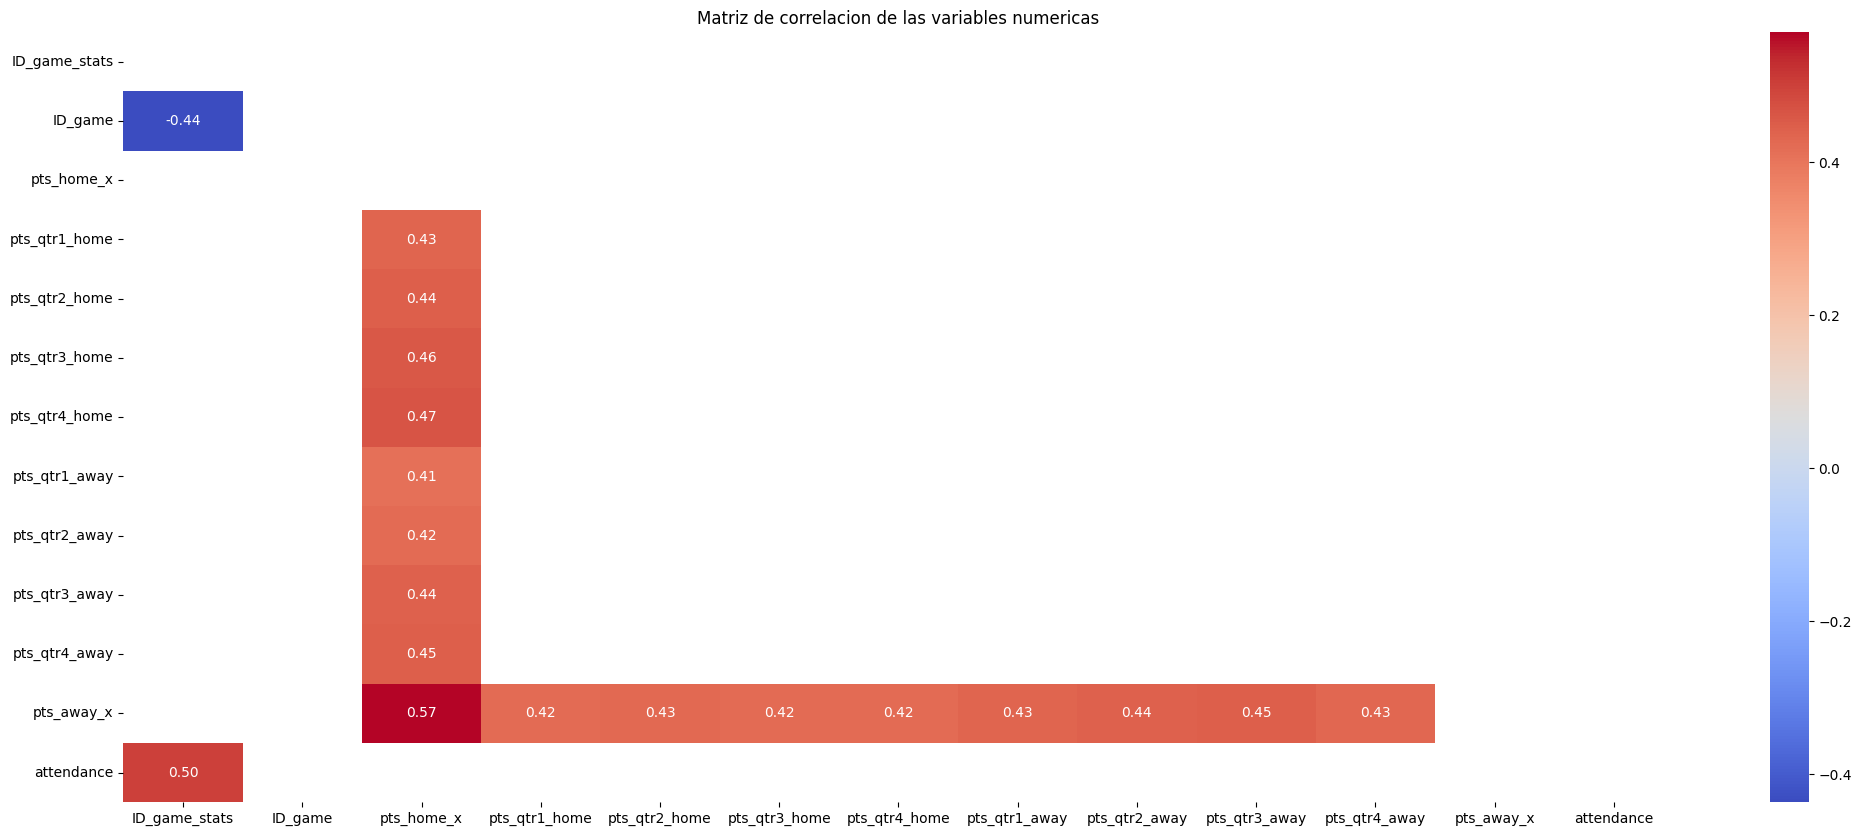

In [9]:
# Realizo una matriz de correlacion para ver las relaciones entre las variables
columnas_numericas = df_game_stats.select_dtypes(include=['float64', 'int64']).columns

# Hacer la correlacion
correlacion = df_game_stats[columnas_numericas].corr()

# Mascara para no mostrar la parte superior del triangulo
mask = np.triu(np.ones_like(correlacion, dtype=bool))

# Mostrar valores superiores a 0.5 en absoluto
correlacion = correlacion[abs(correlacion) > abs(0.4)]

# Crear la grafica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlacion, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlacion de las variables numericas')
plt.show

In [10]:
# Combinar los DataFrames en base a player_id
df_combined = pd.merge(df_draft, df_season, on='ID_season')

df_combined2 = pd.merge(df_combined, df_teams, on='ID_team')

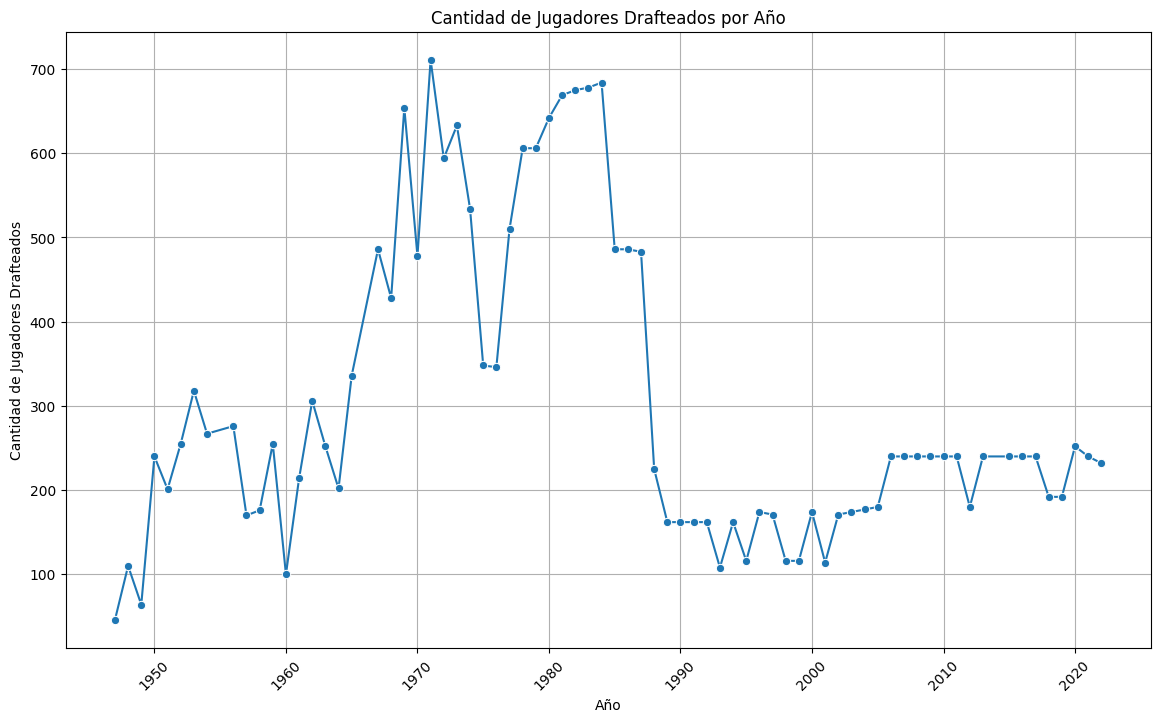

In [11]:
# Procesar los datos: contar jugadores drafteados por año
draft_counts_per_year = df_combined2.groupby('season').size().reset_index(name='draft_count')

# Crear el gráfico de líneas
plt.figure(figsize=(14, 8))
sns.lineplot(data=draft_counts_per_year, x='season', y='draft_count', marker='o')
plt.title('Cantidad de Jugadores Drafteados por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Jugadores Drafteados')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

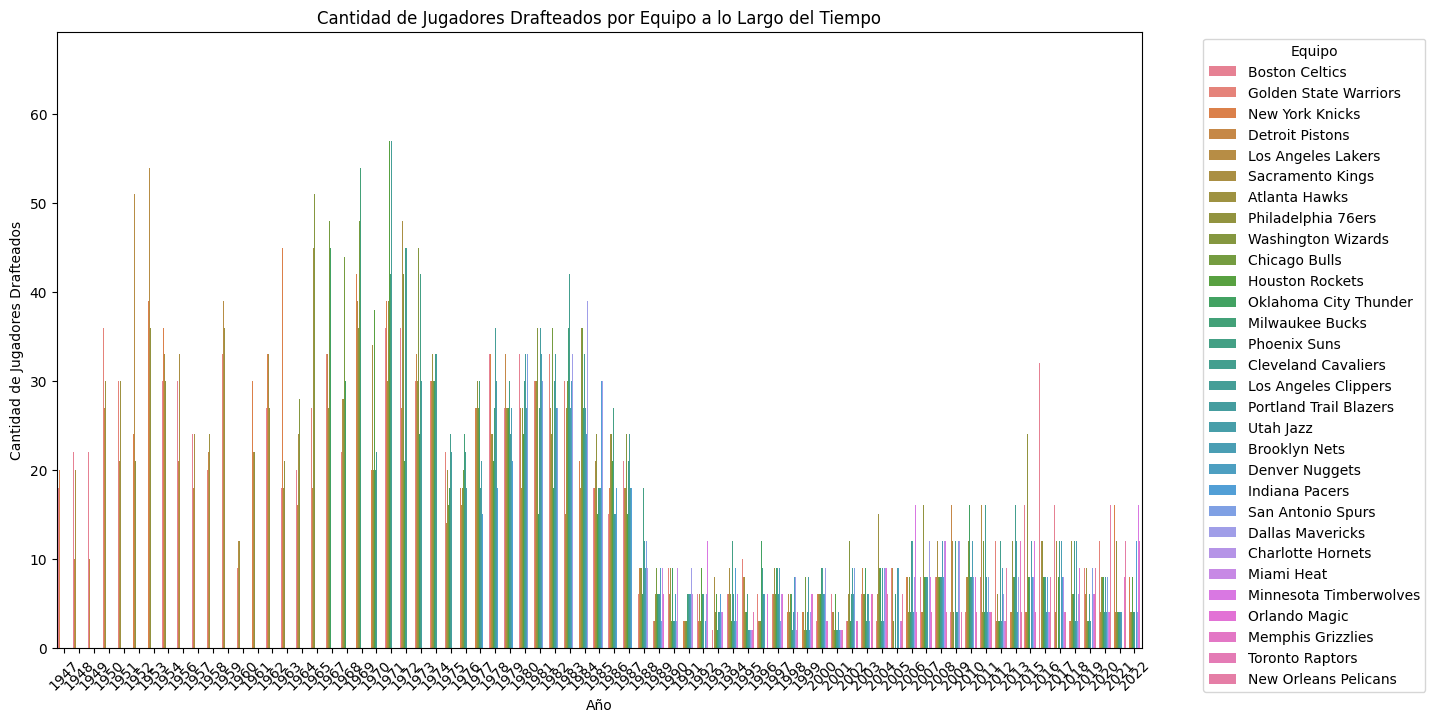

In [12]:
# Procesar los datos: contar jugadores drafteados por equipo y año
draft_counts = df_combined2.groupby(['season', 'full_name']).size().reset_index(name='draft_count')

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(data=draft_counts, x='season', y='draft_count', hue='full_name')
plt.title('Cantidad de Jugadores Drafteados por Equipo a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Jugadores Drafteados')
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

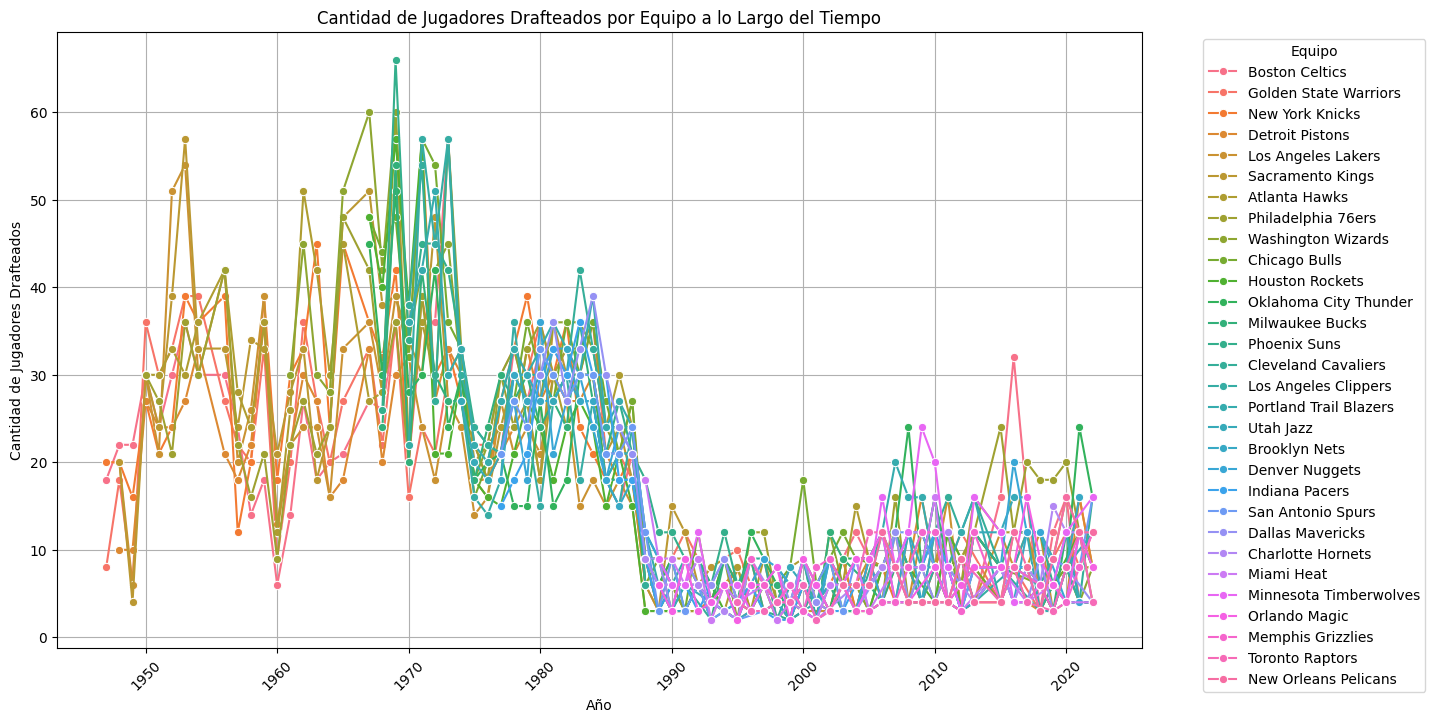

In [13]:
# Crear el gráfico de líneas
plt.figure(figsize=(14, 8))
sns.lineplot(data=draft_counts, x='season', y='draft_count', hue='full_name', marker='o')
plt.title('Cantidad de Jugadores Drafteados por Equipo a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Jugadores Drafteados')
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

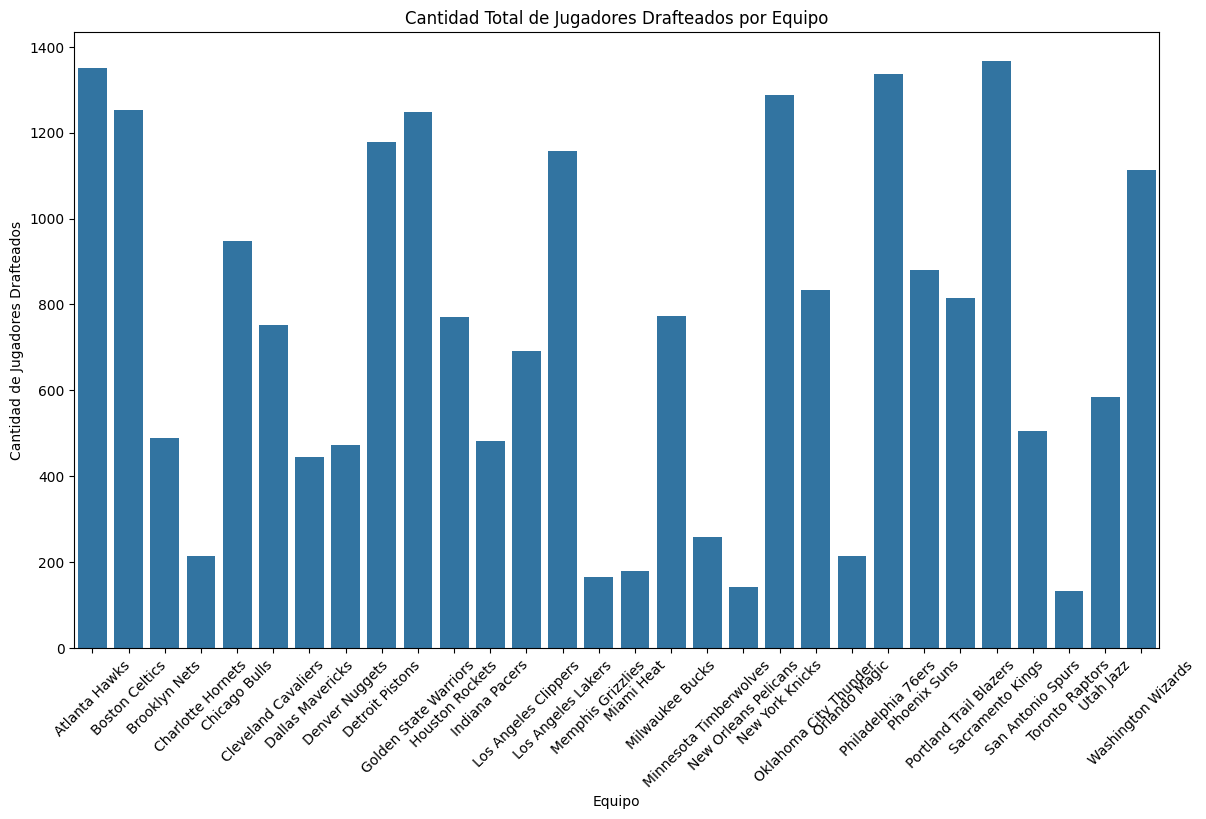

In [14]:
# Procesar los datos: contar jugadores drafteados por equipo
draft_counts = df_combined2.groupby('full_name').size().reset_index(name='draft_count')

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(data=draft_counts, x='full_name', y='draft_count')
plt.title('Cantidad Total de Jugadores Drafteados por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Jugadores Drafteados')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Combinar los DataFrames en base a player_id
df_combined_games = pd.merge(df_games, df_game_stats, on='ID_game')

df_combined_games2 = pd.merge(df_combined_games, df_season, on='ID_season')

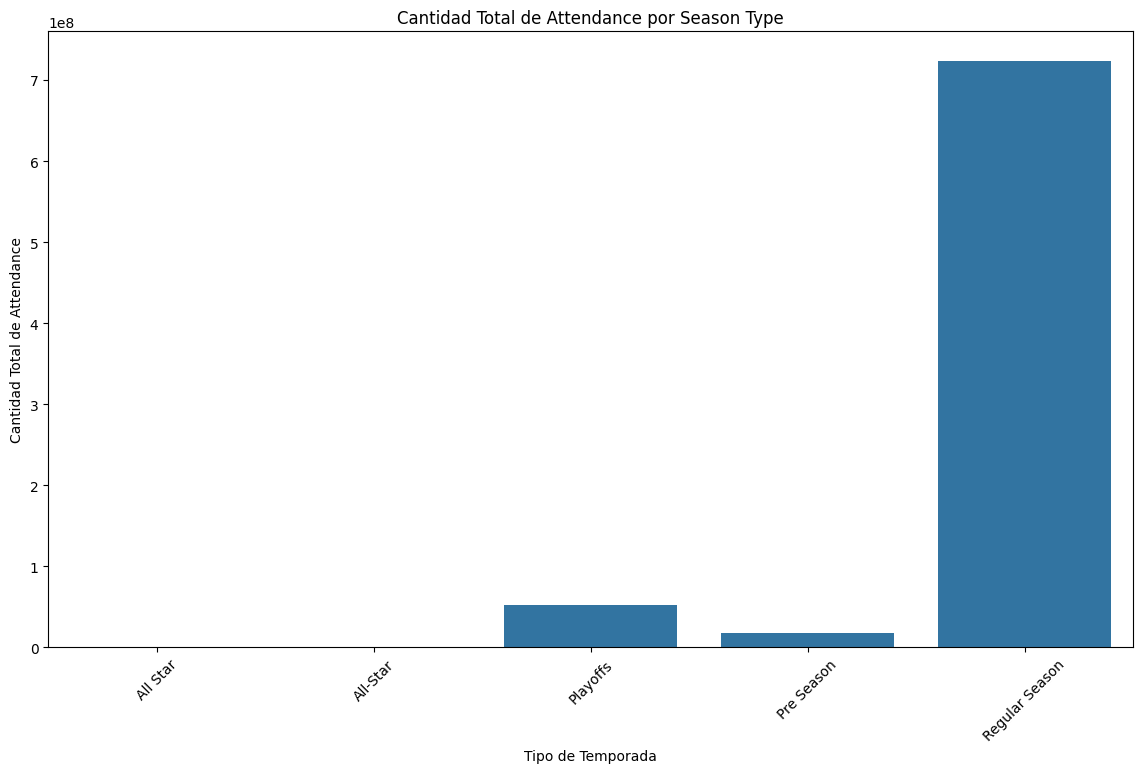

In [16]:
# Procesar los datos: sumar attendance por season_type
attendance_by_season_type = df_combined_games2.groupby('season_type')['attendance'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(data=attendance_by_season_type, x='season_type', y='attendance')
plt.title('Cantidad Total de Attendance por Season Type')
plt.xlabel('Tipo de Temporada')
plt.ylabel('Cantidad Total de Attendance')
plt.xticks(rotation=45)
plt.show()